<span style="color:red"><span style="font-size:30px">Module End Project</span>

Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. The company needs the detailed report and explanation of their employees in each team, also need to identify the following:
1.How many are there in each Team and the percentage splitting with respect to the total employees.
2.Segregate the employees w.r.t different positions.
3.Find from which age group most of the employees belong to.
4.Find out under which team and position, spending in terms of salary is high.
5.Find if there is any correlation between age and salary , represent it visually.
Before doing the above questions,perform pre processing of the dataset. Also, the column height is having incorrect data, changing the data of that particular column with any random numbers between 150 an
d 180.

<span style="font-size:25px; color:blue">Exploratory Data Analysis of Employees of ABC company</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df=pd.read_excel("myexcel.xlsx")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [5]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [7]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [8]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,2023-03-07 00:00:00,231,Kansas,947276.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [10]:
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [6]:
df.describe(include='all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,2023-09-06 00:00:00,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


<span style="font-size:25px">1. HANDLING THE MISSING VALUES </span>

In [18]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

<span style="font-size:20px; color:green">Data story : column college has 84 null values and salary column has 11 null values</span>

<span style="font-size:25px">2. SCATTER PLOT REPRESENTATION OF SALARY DISTRIBUTION </span>

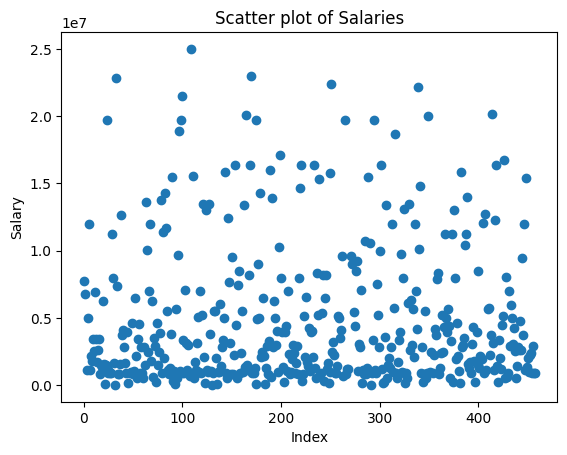

In [19]:
plt.scatter(range(len(df['Salary'])),df['Salary'])
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Scatter plot of Salaries')
plt.show()

<span style="font-size:25px">3.Filling the null values in salary column with 0 and Filling the null values in 'College' column with 'Unknown' </span>

In [20]:
df['Salary'].fillna(0, inplace=True)
df['College'].fillna('Unknown', inplace=True)

<span style="font-size:25px">4. HANDLING DUPLICATE VALUES </span>

In [21]:
duplicate=df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Name, Team, Number, Position, Age, Height, Weight, College, Salary]
Index: []


<span style="font-size:20px; color:green">Data story : No duplicate rows has been found</span>

<span style="font-size:25px">5. Filling the column 'Height' with random values between 150 - 180 </span>

In [22]:
df['Height']=np.random.uniform(150,180,len(df))
df['Height']

0      168.455617
1      170.940538
2      159.546777
3      164.121726
4      173.009225
          ...    
453    164.140084
454    157.775299
455    158.073477
456    167.876411
457    159.876636
Name: Height, Length: 458, dtype: float64

<span style="font-size:25px">6. How many are there in each Team and the percentage splitting with respect to the total employees. </span>

In [6]:
# Count the number of employees in each team
team_counts = df['Team'].value_counts()

In [7]:
print("Number of employees in each team:")
print(team_counts)

Number of employees in each team:
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64


<span style="font-size:20px; color:green">Data story : New Orleans Pelicans have the most number of employees, 19. </span>

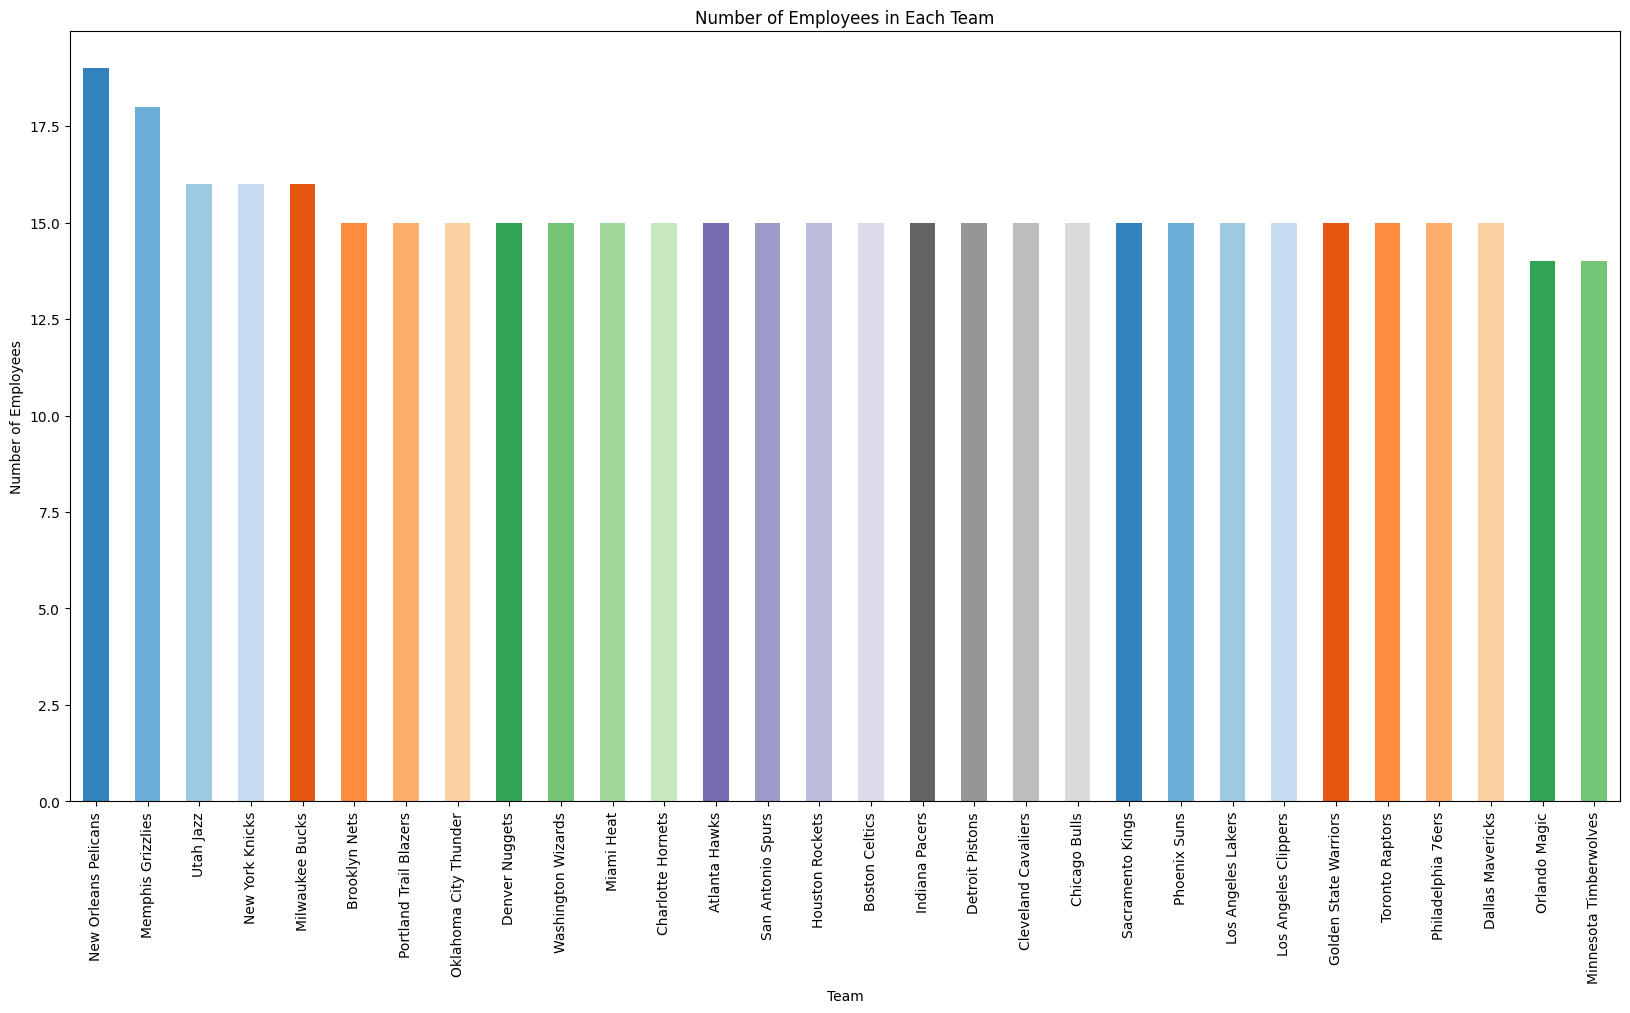

In [8]:
plt.figure(figsize=(20, 10))
team_counts.plot(kind='bar', color=plt.cm.tab20c.colors)
plt.title('Number of Employees in Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.show()

<span style="font-size:20px; color:green">Data story : Percentage splitting</span>

In [9]:
# Calculate the total number of employees
total_employees = len(df)

# Calculate the percentage splitting for each team
percentage_splitting = (team_counts / total_employees) * 100

In [10]:
print("\nPercentage splitting with respect to the total employees:")
print(percentage_splitting)


Percentage splitting with respect to the total employees:
Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        

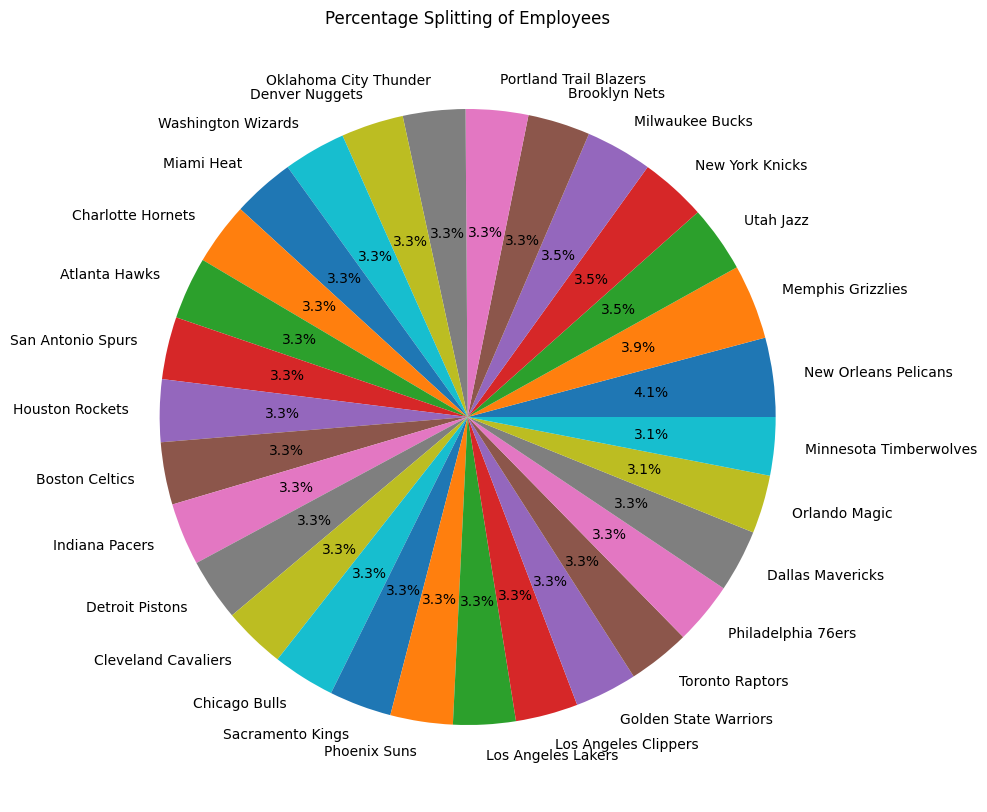

In [12]:
plt.figure(figsize=(10,10))
plt.pie(percentage_splitting,autopct='%1.1f%%', labels=percentage_splitting.index)
plt.title('Percentage Splitting of Employees')
plt.show()

<span style="font-size:20px; color:green">Data story : New Orleans Pelicans have the most number of employees among other teams and the percentage splitting is 4.148472% </span>

<span style="font-size:25px">7. Segregate the employees w.r.t different positions. </span>

In [13]:
# Group the DataFrame by 'Position' and count the number of employees in each position
position_counts = df.groupby('Position').size()

In [14]:
print("Employees segregated by position:")
print(position_counts)

Employees segregated by position:
Position
C      79
PF    100
PG     92
SF     85
SG    102
dtype: int64


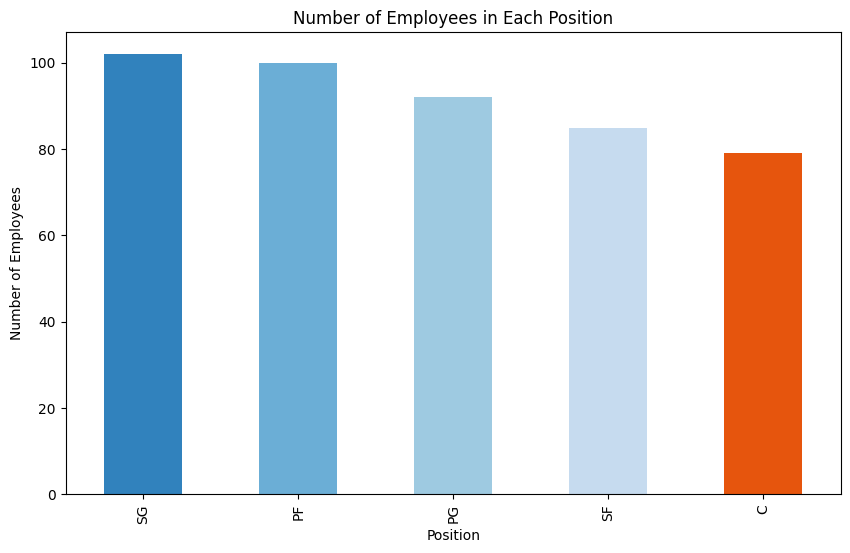

In [19]:
position_counts = df['Position'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color=plt.cm.tab20c.colors)
plt.title('Number of Employees in Each Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.show()

<span style="font-size:20px; color:green">Data story : From the bar chart we can understand that most decorated position is 'SG' and we have 102 employees in that position</span>

In [29]:
bins = [0, 20, 25, 30, 35, 40, 45, 50, 55]  
labels = ['0-20', '21-25', '26-30', '31-35', '36-40', '41-45','46-50','51-55']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [30]:
# Count the number of employees in each age group
age_group_counts = df['Age Group'].value_counts()

# Find the most common age group
most_common_age_group = age_group_counts.idxmax()

In [31]:
print("Number of employees in each age group:")
print(age_group_counts)
print("\nMost common age group:", most_common_age_group)

Number of employees in each age group:
Age Group
26-30    182
21-25    152
31-35     90
36-40     29
41-45      3
0-20       2
46-50      0
51-55      0
Name: count, dtype: int64

Most common age group: 26-30


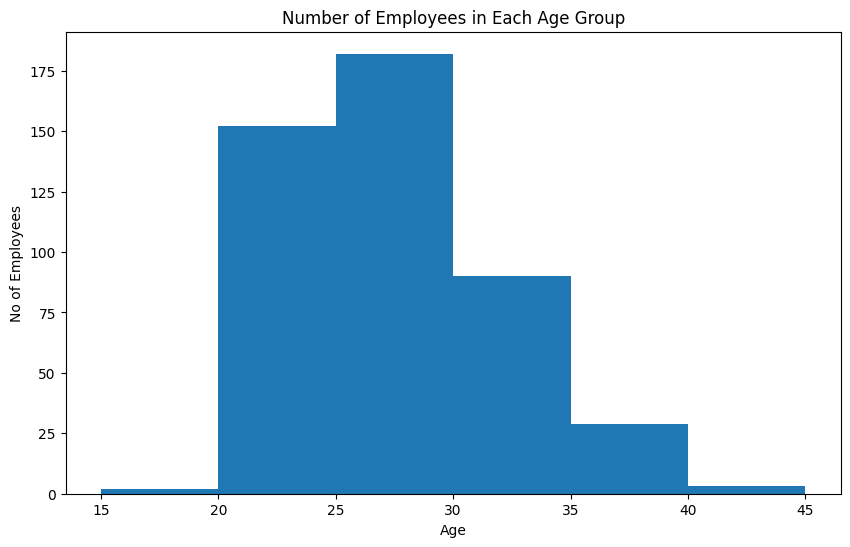

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins = [15,20,25,30,35,40,45]) 
plt.xlabel('Age')
plt.ylabel('No of Employees')
plt.title('Number of Employees in Each Age Group')
plt.show()

<span style="font-size:20px; color:green">Data story :Most number of employees are comes between the age of 21-30, 334 employees. In that most of them are in between 26-30,182 employees</span>

In [35]:
# Group the DataFrame by 'Team' and 'Position' and sum the salaries
team_position_salary = df.groupby(['Team', 'Position'])['Salary'].sum()

# Find the combination with the highest total salary
highest_spending_combination = team_position_salary.idxmax()
highest_spending_salary = team_position_salary.max()

print("Under which team and position the spending in terms of salary is high:")
print("Team:", highest_spending_combination[0])
print("Position:", highest_spending_combination[1])
print("Total Salary:", highest_spending_salary)

Under which team and position the spending in terms of salary is high:
Team: Los Angeles Lakers
Position: SF
Total Salary: 31866445.0


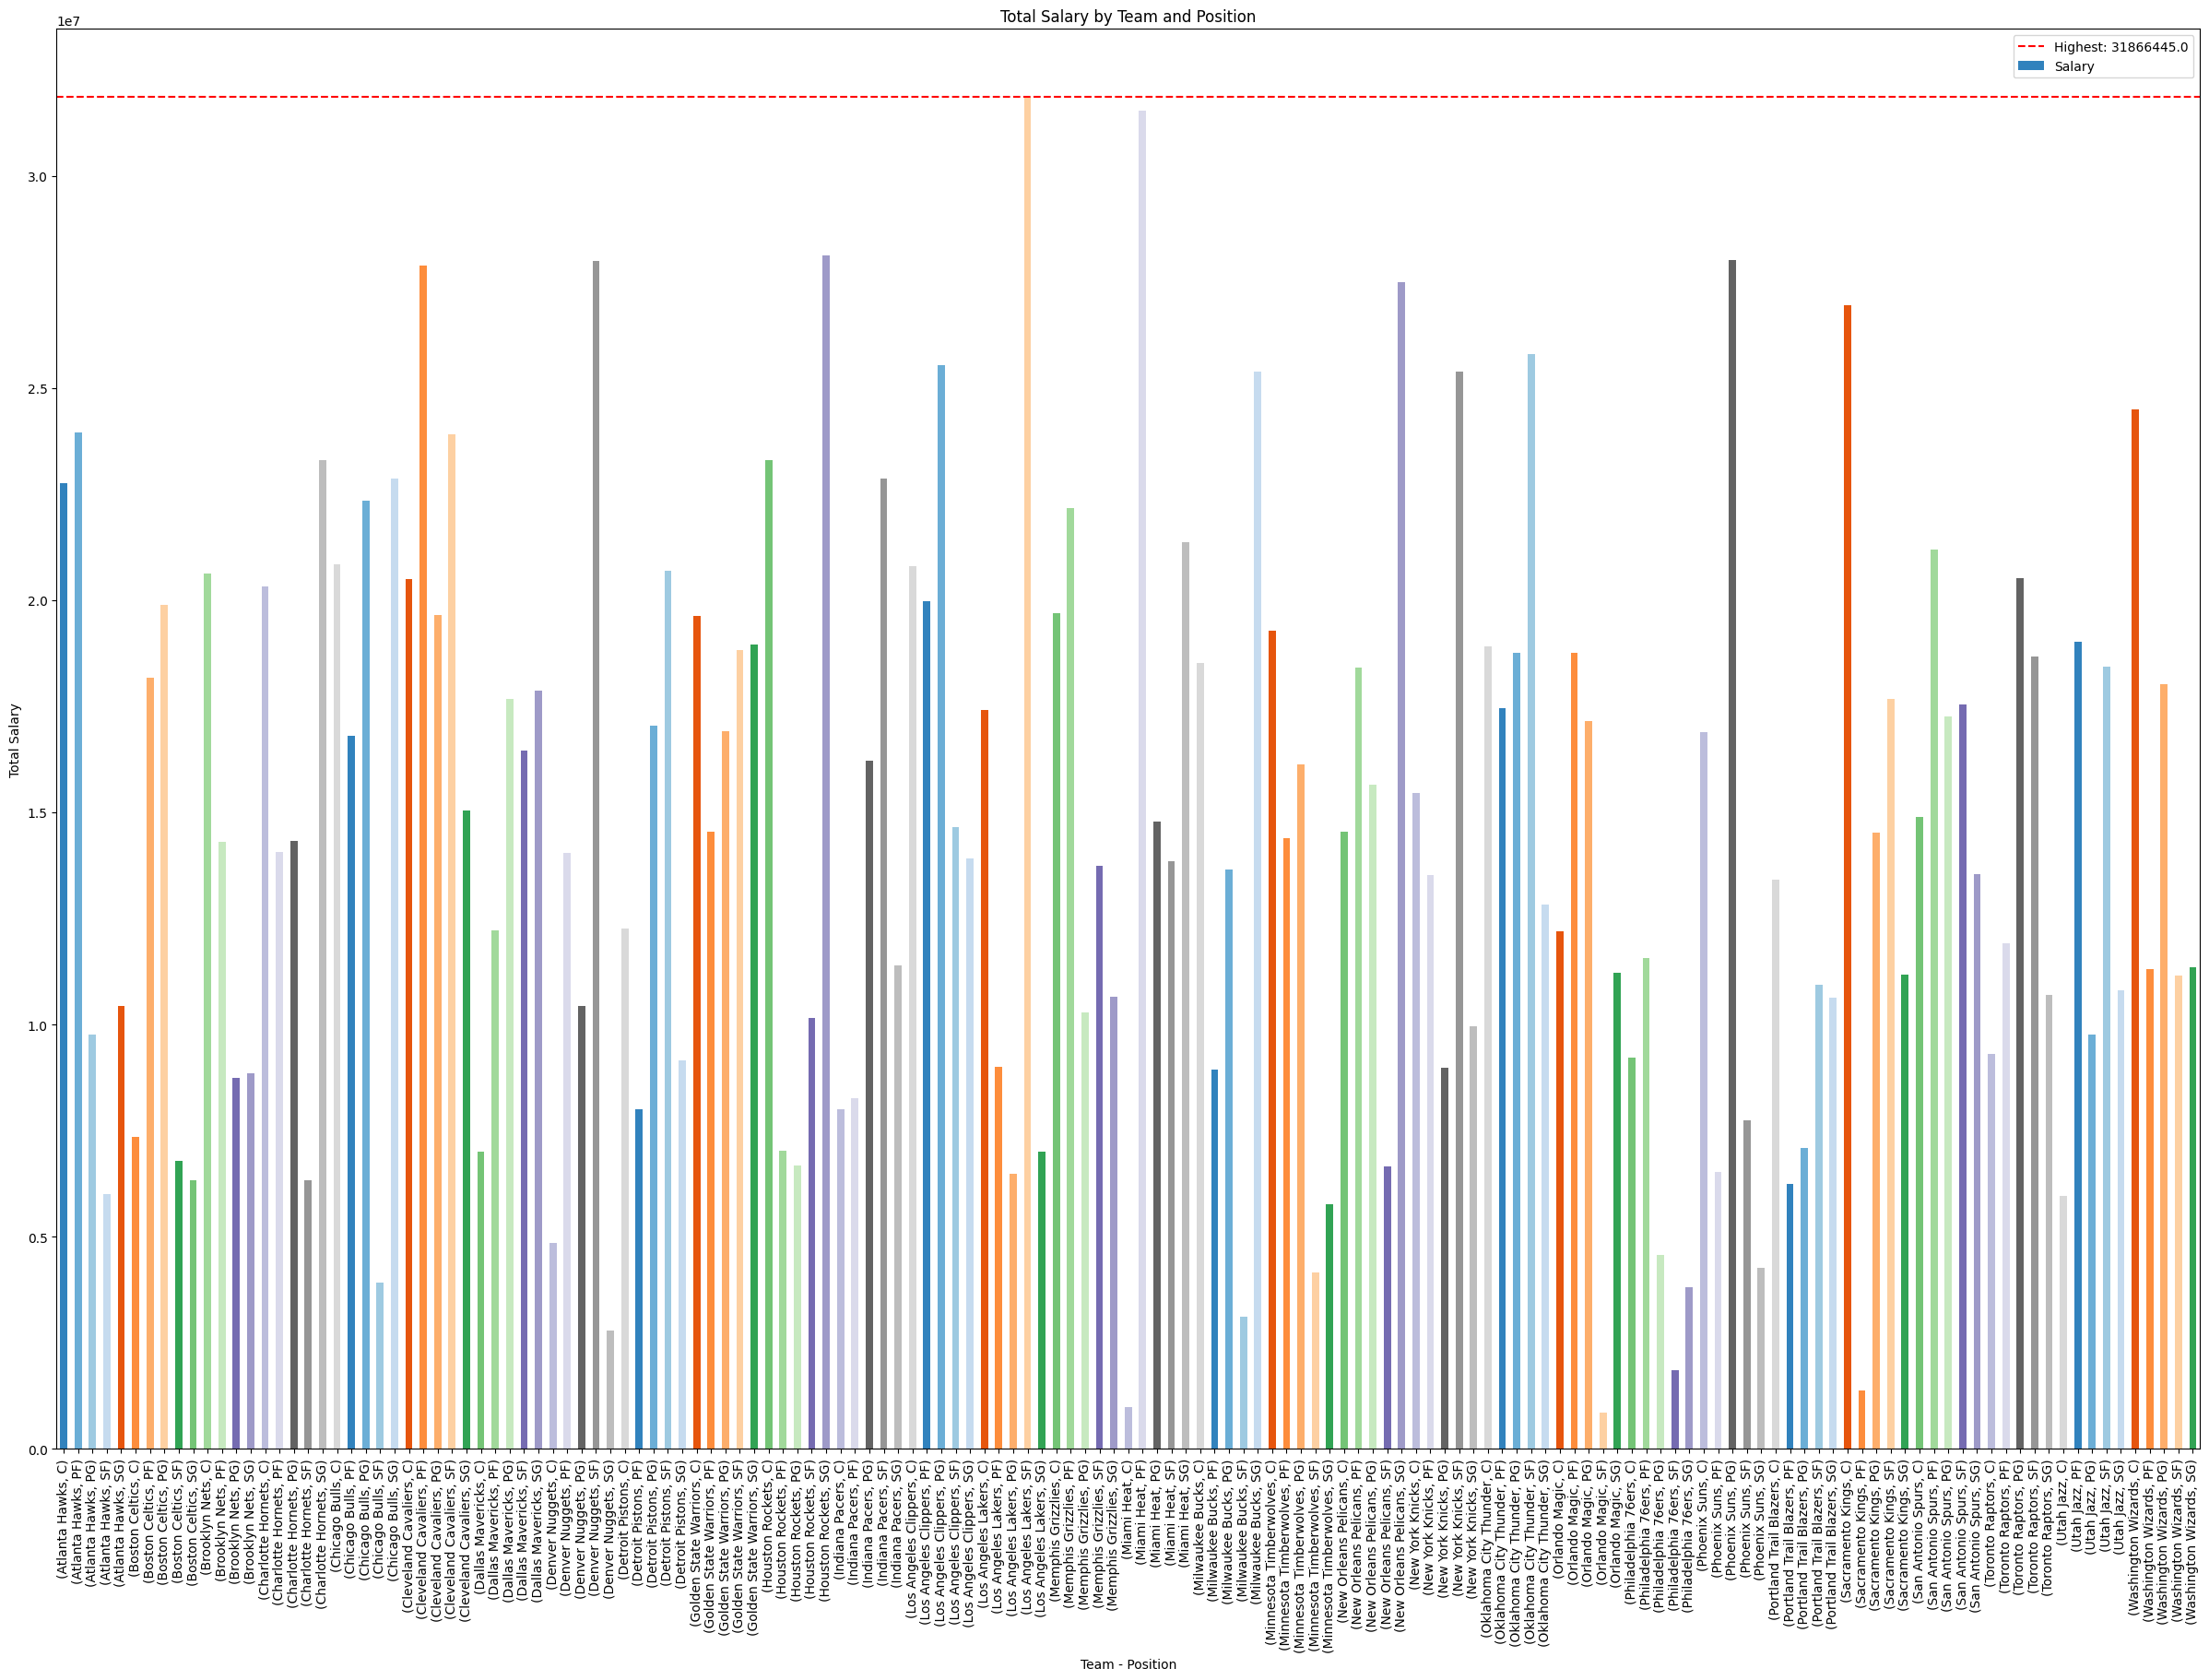

In [43]:
team_position_salary = df.groupby(['Team', 'Position'])['Salary'].sum()

# Find the combination with the highest total salary
highest_spending_combination = team_position_salary.idxmax()
highest_spending_salary = team_position_salary.max()

# Plotting the bar chart
plt.figure(figsize=(30, 20))
team_position_salary.plot(kind='bar', color=plt.cm.tab20c.colors)
plt.title('Total Salary by Team and Position')
plt.xlabel('Team - Position')
plt.ylabel('Total Salary')
plt.xticks(rotation=90)
plt.axhline(y=highest_spending_salary, color='red', linestyle='--', label=f'Highest: {highest_spending_salary}')
plt.legend()
plt.show()

In [ ]:
<span style="font-size:20px; color:green">Data story :Los Angeles Lakers has spend the highest amount as salary  31866445 and the highest paid position is SF </span>

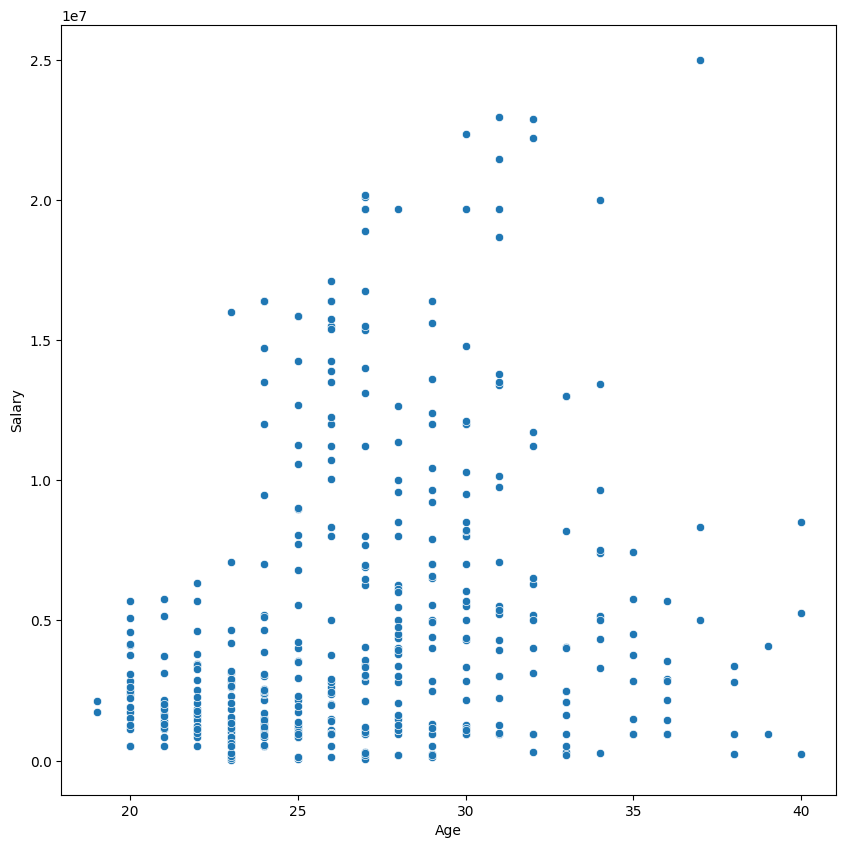

In [15]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.show()

<span style="font-size:20px; color:green">Data story :The scatterplot depicts the relation between Age and Salary of employees </span>

In [23]:
df2=df[['Position','Age','Height','Weight','Salary']]
df2

,Position,Age,Height,Weight,Salary
0,PG,25,168.455617,180,7730337.0
1,SF,25,170.940538,235,6796117.0
2,SG,27,159.546777,205,0.0
3,SG,22,164.121726,185,1148640.0
4,PF,29,173.009225,231,5000000.0
...,...,...,...,...,...
453,PG,26,164.140084,203,2433333.0
454,PG,24,157.775299,179,900000.0
455,C,26,158.073477,256,2900000.0
456,C,26,167.876411,231,947276.0


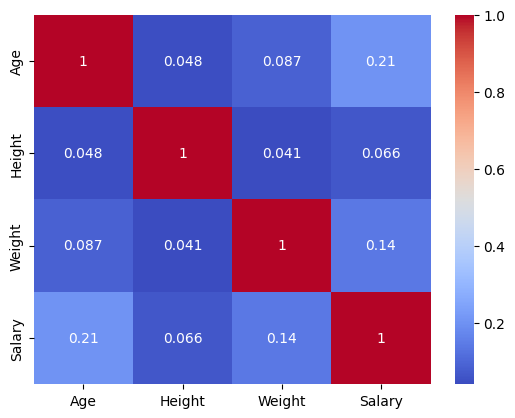

In [24]:
df3=df2.drop('Position', axis='columns')
corr = df3.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

<span style="font-size:20px; color:green">Data story :The heatmap shows the correlation between Age,Salary,Height and weight of employees </span>

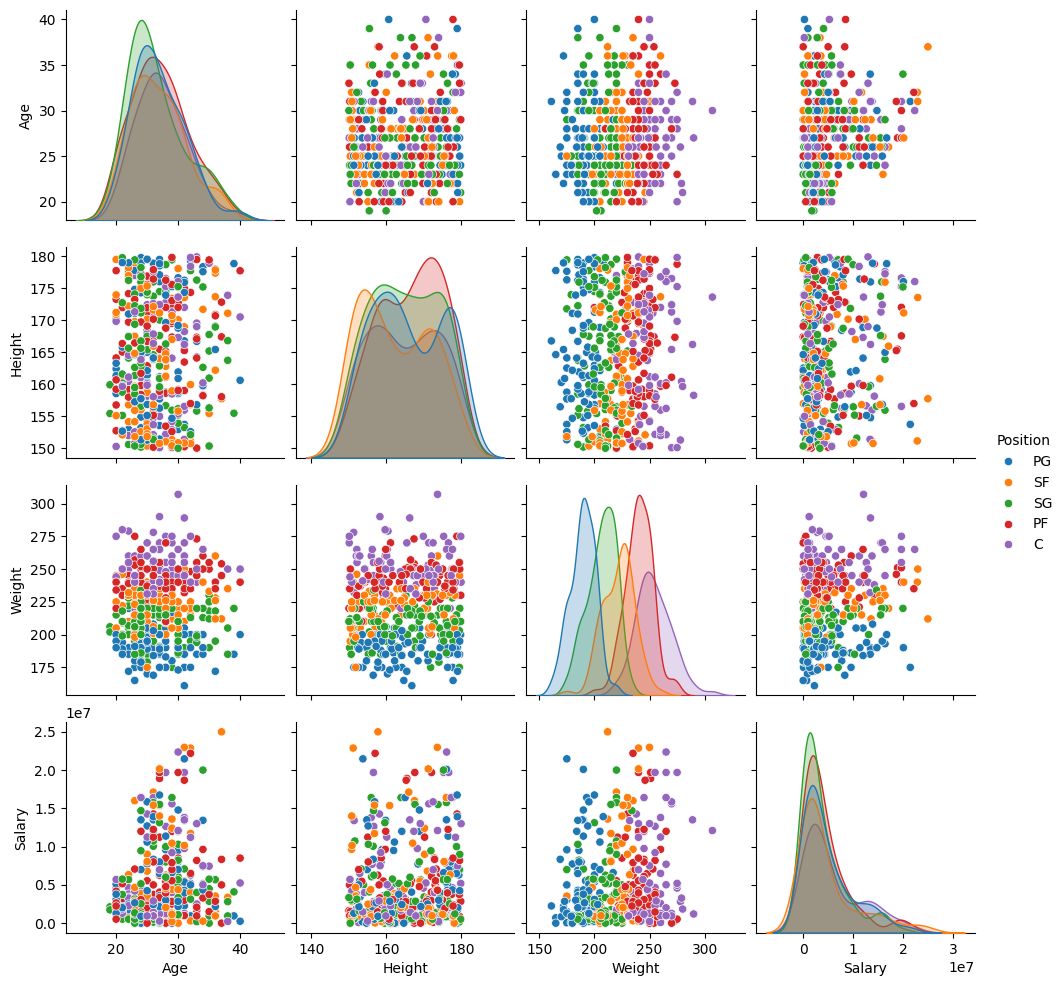

In [26]:
sns.pairplot(df2,hue="Position")
plt.show()

<span style="font-size:20px; color:green">Data story :Pair plotted different variable </span>

<span style="font-size:25px">Data Preprocessing Overview: </span>


1.Initial assessment using the info() method revealed a dataset comprising 458 entries across 9 columns: Name, Team, Number, Position, Age, Height, Weight, College, and Salary. Notably, the "College" and "Salary" columns contained missing values, while the other columns were fully populated.

2.To address inaccuracies in the "Height" column, its values were substituted with random numbers ranging between 150 and 180 cm.

3.A subsequent null value check highlighted 84 missing entries in "College" and 11 in "Salary". These gaps underscored the necessity for data cleaning.

4.All detected null values were replaced with the median of their respective columns to maintain data integrity.

<span style="font-size:25px">Data Visualization Insights:</span>

1. A dataframe was constructed to depict the team composition, featuring columns for Team and Count, where Count represented the number of individuals per team. A bar graph illustrating this data revealed the New Orleans Pelicans as the team with the most employees.

2. The workforce distribution was further analyzed by calculating the percentage of employees per team against the total workforce, which was visualized using a pie chart. This analysis showed that the New Orleans Pelicans constituted nearly 4% of the overall employee base.
3. An exploration into the number of employees per position was conducted, with findings presented through a bar graph. This revealed that the "SG" (Shooting Guard) position was the most populated among employees.
4. Employee demographics were segmented into age groups, with a dedicated dataframe and histogram used for visualization. This highlighted a predominant age group of 26-30 years among the employees.
5. A specialized dataframe was created by grouping employees based on "Team" and "Position", facilitating the calculation of total salaries within each group. Bar graph visualization of this data indicated that the "SF" (Small Forward) position within the Los Angeles Lakers commanded the highest salary expenditure.
6. Lastly, a correlation analysis between Age and Salary was conducted. The resulting graph suggested no clear correlation, with most salaries falling below the 1,00,00,000 mark, indicating a diverse range of earnings unrelated to age.